# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

Se incluyen primero todos los imports necesarios.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
RANDOM_STATE = 83

# Parte 2: Clasificación

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [3]:
#Creamos el dataframe
df = pd.read_csv("cleveland.csv")
#Indicamos qué variables son categóricas.
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
df['target'] = df['target'].astype('category')
#Quitamos toda fila a la que le falte información.
df = df.dropna(axis=0)
#Añadimos columna que indica si está enfermo o no (Quizá cambiar en función de lo que cuente el profe)
dic = {0:'normal',1:'enfermo',2:'enfermo',3:'enfermo',4:'enfermo'}
df['result'] = df['target'].map(dic)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

Vamos a ver primero cúantos individuos tenemos en cada una de las dos clases, así como la frecuencia de cada una.

In [4]:
df['result'].value_counts()

normal     160
enfermo    137
Name: result, dtype: int64

In [5]:
df['result'].value_counts() / df['result'].count() * 100

normal     53.872054
enfermo    46.127946
Name: result, dtype: float64

Vemos que tenemos un buen equilibrio entre ambas clases, aunque la clase 'normal' es algo más frecuente que la clase 'enfermo'. 

Ahora veremos los descriptores estadísticos de las variables.

In [6]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


Como hay una gran diferencia entre el rango de los valores que toman 'oldpeak' y 'ca' respecto al resto de las variables, es posible que sea necesario escalarlas antes.

Vemos además que no se han tenido en cuenta las variables que establecimos como categóricas.

Ahora usaremos pairplot para ver el diagrama de dispersión de las variables y cómo están relacionadas entre sí.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserW

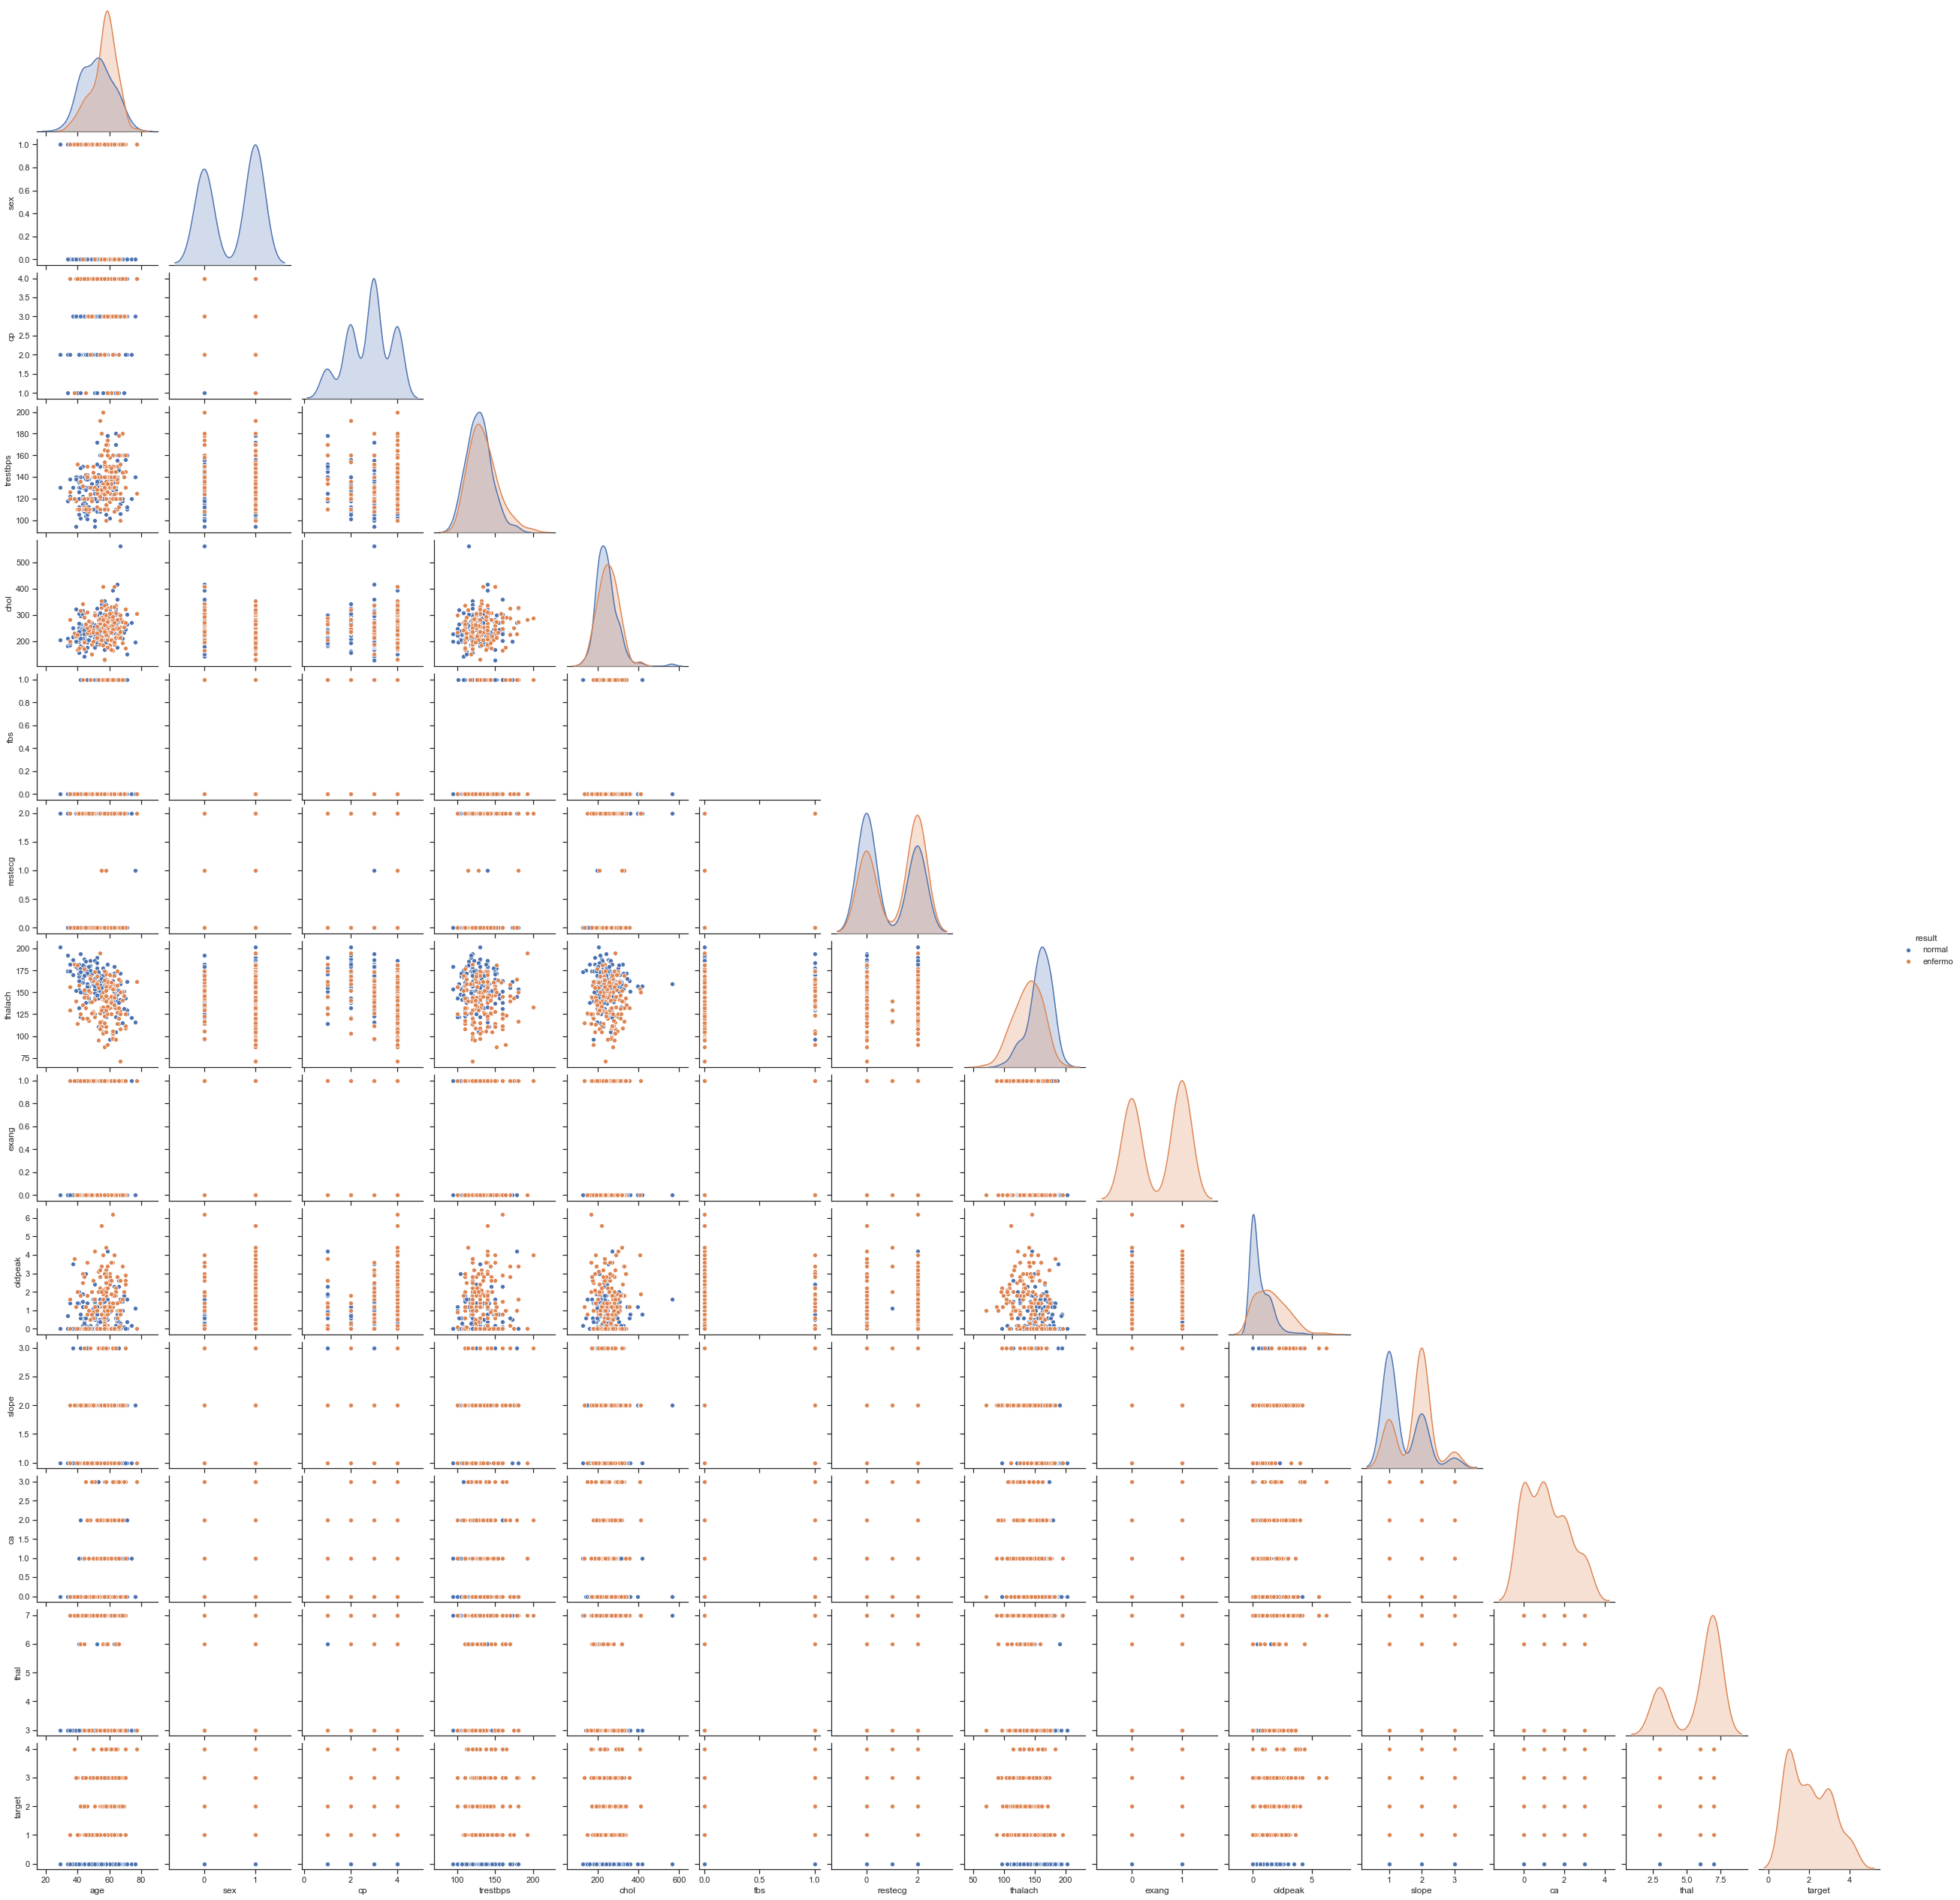

In [7]:
sns.set(style = "ticks")
sns.pairplot(df, hue = "result", corner = True)

Como se puede apreciar, en la mayoría de las gráficas, los datos para individuos 'normales' y 'enfermos' están bastante mezclados, especialmente en aquellas variables que no hemos determinado como categóricas.

Vemos ahora los coeficientes de correlación.

In [8]:
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


Vemos que, aunque no demasiada, las variables con algo de correlación notable son 'age', 'trestbps', 'thalach', 'oldpeak' y 'ca'.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Aunque antes hemos dicho que es posible que haya que escalar los datos debdo a la diferencia de sus rangos, puesto que el árbol de decisión no es sensible a esto, no será necesario.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

Primero vamos a ver qué resultados obtenemos partiendo los datos en entrenamiento (70%) y test (30%).

In [9]:
#Quitamos la variable target y creamos el array de datos para el entrenamiento.
df_data = df.drop(['target'],axis=1)
df_data = df_data.drop(['result'],axis=1)
train_data = df_data.values
#Array variable de salida
out_data = df['result']

# Partimos el conjunto de datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(train_data, out_data, test_size=0.3, random_state=RANDOM_STATE)

# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
train_accuracy, test_accuracy

(1.0, 0.6777777777777778)

Vemos que ha clasificado a la perfección los datos de entrenamiento, pero no da tan buenos resultados con los de test, por lo que tenemos sobreaprendizaje.

Vamos a emplear ahora validación cruzada para intentar encontrar mejores resultados, así como qué profundidad del árbol de decisión nos da también resultados mejores.

In [10]:
#Quitamos la variable target y creamos el array de datos para el entrenamiento.
df_data = df.drop(['target'],axis=1)
df_data = df_data.drop(['result'],axis=1)
train_data = df_data.values
#Array variable de salida
out_data = df['result']

train_accuracy = []
test_accuracy = []

# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf = clf.fit(train_data, out_data)

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 15)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, train_data, out_data, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9139569008888143,
  0.9502557437531444,
  0.970835429593605,
  0.9831796075800773,
  0.9932682095142267,
  0.9985060651797195,
  0.9992523338364357,
  1.0,
  1.0,
  1.0],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7608045977011495,
  0.7571264367816093,
  0.7539080459770114,
  0.7709195402298851,
  0.764022988505747,
  0.7775862068965518,
  0.7639080459770116,
  0.7674712643678162,
  0.7606896551724139,
  0.7606896551724139,
  0.7606896551724139])

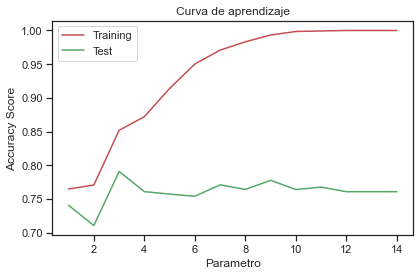

In [11]:
# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Como se puede apreciar, para max_depth=3 tenemos el máximo para la precisión de test, a partir del cual decrece para este y sigue aumentando para la de entrenamiento, lo que nos indica que a partir de ahí se está sobre-entrenando. Por ello, tomaremos 3 como la profundidad máxima de nuestro árbol. De todas formas tener un máximo de algo más de 0.79 de precisión de test puede no parecer un valor muy alto. Quizá se deba a la gran cantidad de variables categóricas que se tienen.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

In [12]:
df_target_names = np.array(['normal','enfermo'])
df_feature_names = np.array(['age','sex','cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

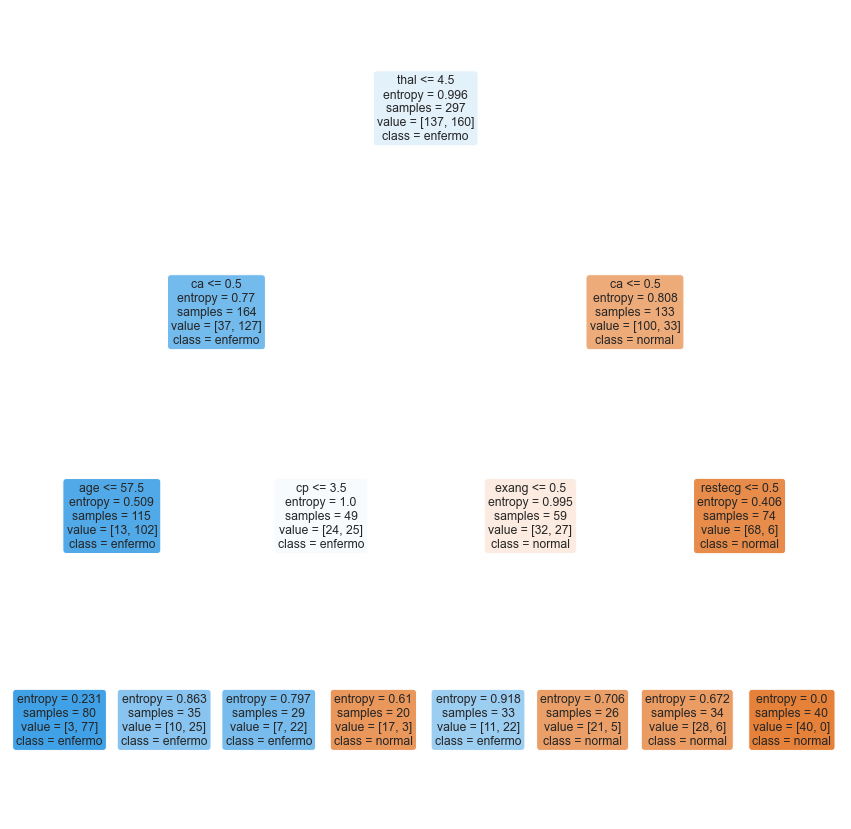

In [13]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(train_data, out_data)
#Nos quedamos aquí solo con los nombres de las variables (menos target y result)
df_target_names = np.array(['normal','enfermo'])
df_feature_names = np.array(['age','sex','cp', 'trestbps', 'chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=df_feature_names, class_names=df_target_names, rounded=True)
plt.show()

Por algún motivo no aparecen las flechas de nodo padre a hijo, pero se intuyen pues cada nodo tiene dos hijos (el problema es que el fono es blanco y las flechas también lo son).

Vemos por orden de importancia, que _ca_ ha sido utilizada 2 veces, seguida de _thal_ , _age_ , _cp_ , _exang_ y _restecg_ , que aparecen solo 1 vez. El resto de variables no han sido utilizadas en el árbol como discriminantes en la toma de decisiones. Todas ellas tienen sentido, ya que casi todas ellas son variables categóricas, cuyos resultados indican directamente posibles problemas de corazón (_ca_ inidica número de vasos sanguíneos obstruidos, de forma similar también lo hace _thal_ , así como las demás). También la edad es un factor importante en este tipo de enfermedades.

Las variables que no han sido utilizadas son _sex_ , _trestbps_ , _chol_ , _fbs_ , _thalach_ , _oldpeak_ y _slope_ . Todas ellas también son clave en la detección de estos tipos de enfermedades del corazón, aunque quizá no sean tan discriminatorias como las que si han aparecido en el árbol. También hay que tener en cuenta la baja profundidad del árbol, lo que no da lugar a que haya muchos nodos y por ello se tengan en cuenta todas las variables.

Tenemos que, partiendo de la raíz y tras la primera pregunta, tenemos:

- 37 falsos positivos, 127 verdaderos positivos en el hijo izquierdo.
- 100 verdaderos negativos, 33 falsos negativos en el hijo derecho.

Por tanto, con solo una pregunta tenemos una _acuracy_ = 227/297=0.76430976431.

Viendo los nodos hoja, solamente hay 2 (el primero y el último) con una baja entropía, por lo que al final no se han conseguido separar del todo las dos clases en el árbol.

El segundo nodo, con una entropía de 0.863 (10 frente a 25) y el quinto, con una entropía de 0.918 (11 frente a 22), por lo que, aún habiendo empleado la profundidad óptima, tenemos hojas que nos dan dado muy malos resultados.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [14]:
# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, train_data, out_data, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


In [15]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, train_data, out_data, cv=10)

# Informe por clases
cr = classification_report(out_data,predictions, target_names=df_target_names)
print(cr)

              precision    recall  f1-score   support

      normal       0.82      0.71      0.76       137
     enfermo       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



Vemos por el valor de recall que se detectan únicamente el 71% de casos normales y el 86% de enfermos, que solo acierta con el 82% de normales y el 78% de enfermos, valores que no parecen tan altos como deberían.

Pintamos ahora la matriz de confusión para ver esto de forma más visual.

In [16]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


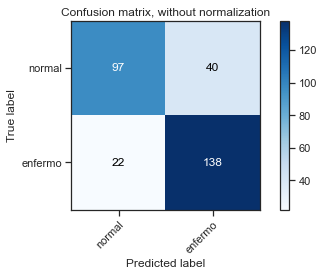

In [17]:
plot_confusion_matrix(out_data, predictions, df_target_names, normalize=False)

Viendo que el árbol no ha sido capaz de separar totalmente las dos clases (normal y enfermo), así como la baja precisión y exhaustividad,vemos que no es muy fiable. Ya vimos que la precisión de test para la profundidad óptima era de apenas un 79%, luego ya de primeras no nos daba demasiada confianza. Por tanto, aunque podría usarse para hacerse una idea sobre si un individuo presenta una enfermedad del corazón o no, no debe emplearse totalmente como discriminante. Además, aunque no ha separado del todo las clases, el árbol permite hacernos una idea de que variables son las principales discriminantes para determinar la clase de una forma más directa, así como los valores que deben tomar para hacer esa distinción, indicando así que resultados pueden ser los más importantes a la hora de llevar a cabo el diagnóstico.